## IRIS Flower Classification 

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\91999\Downloads\archive (6)\Iris.csv")

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape

(150, 6)

## Exploratory Data Analysis

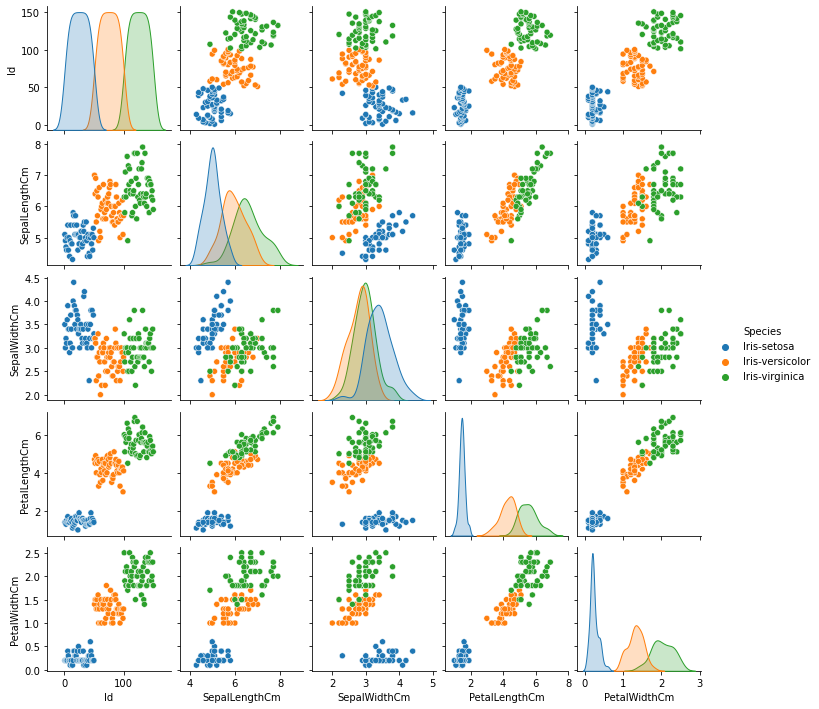

In [8]:
sns.pairplot(df, hue='Species', height=2)
plt.show()

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot`

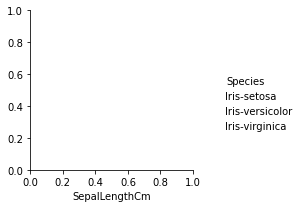

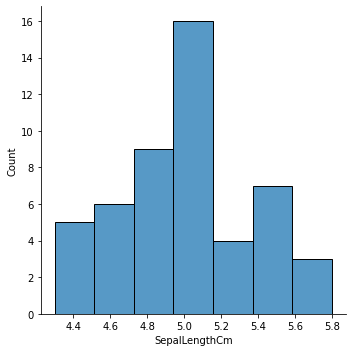

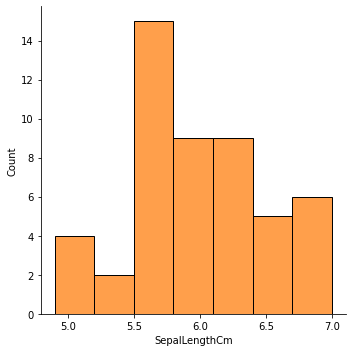

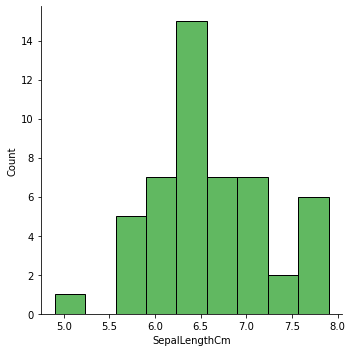

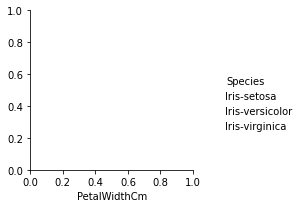

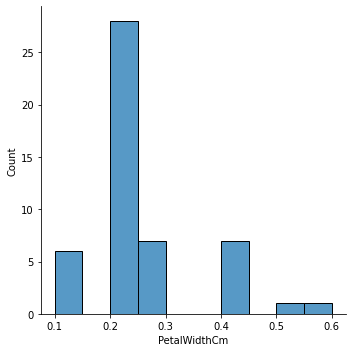

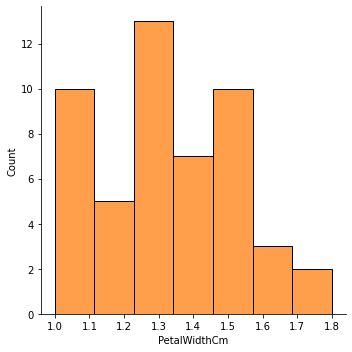

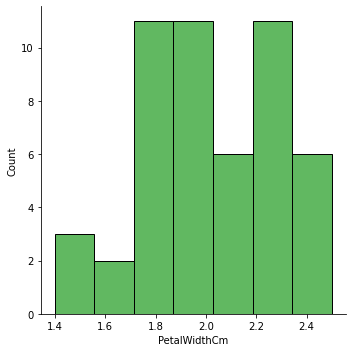

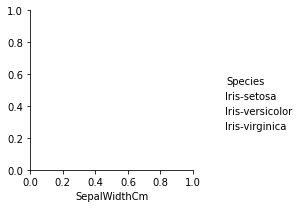

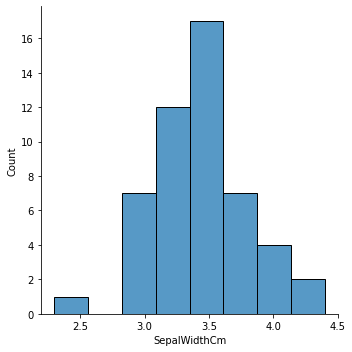

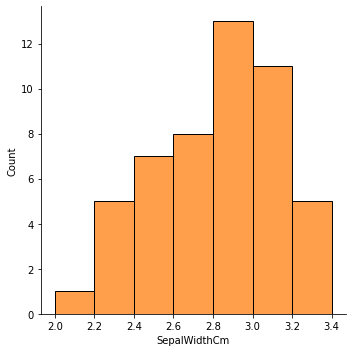

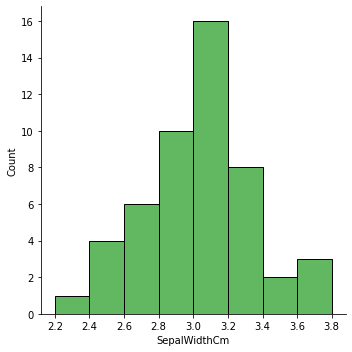

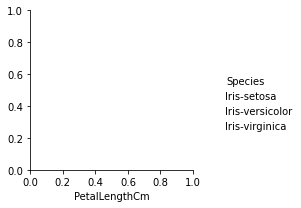

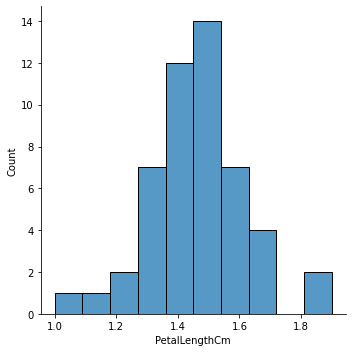

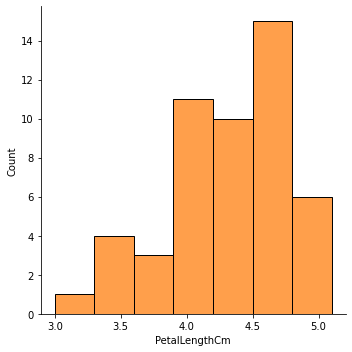

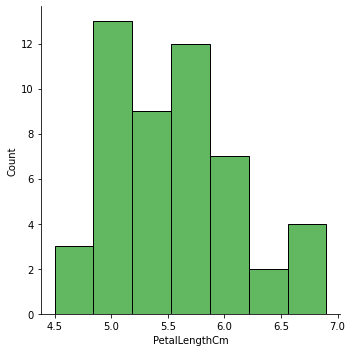

In [9]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "SepalLengthCm").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "PetalWidthCm").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "SepalWidthCm").add_legend()
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.displot, "PetalLengthCm").add_legend()
plt.show()

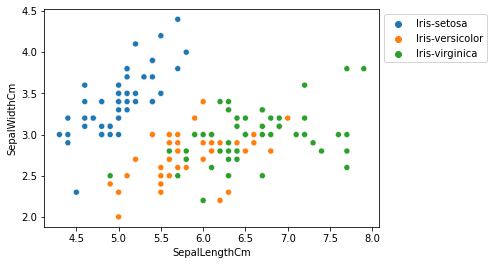

In [10]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df, hue='Species')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

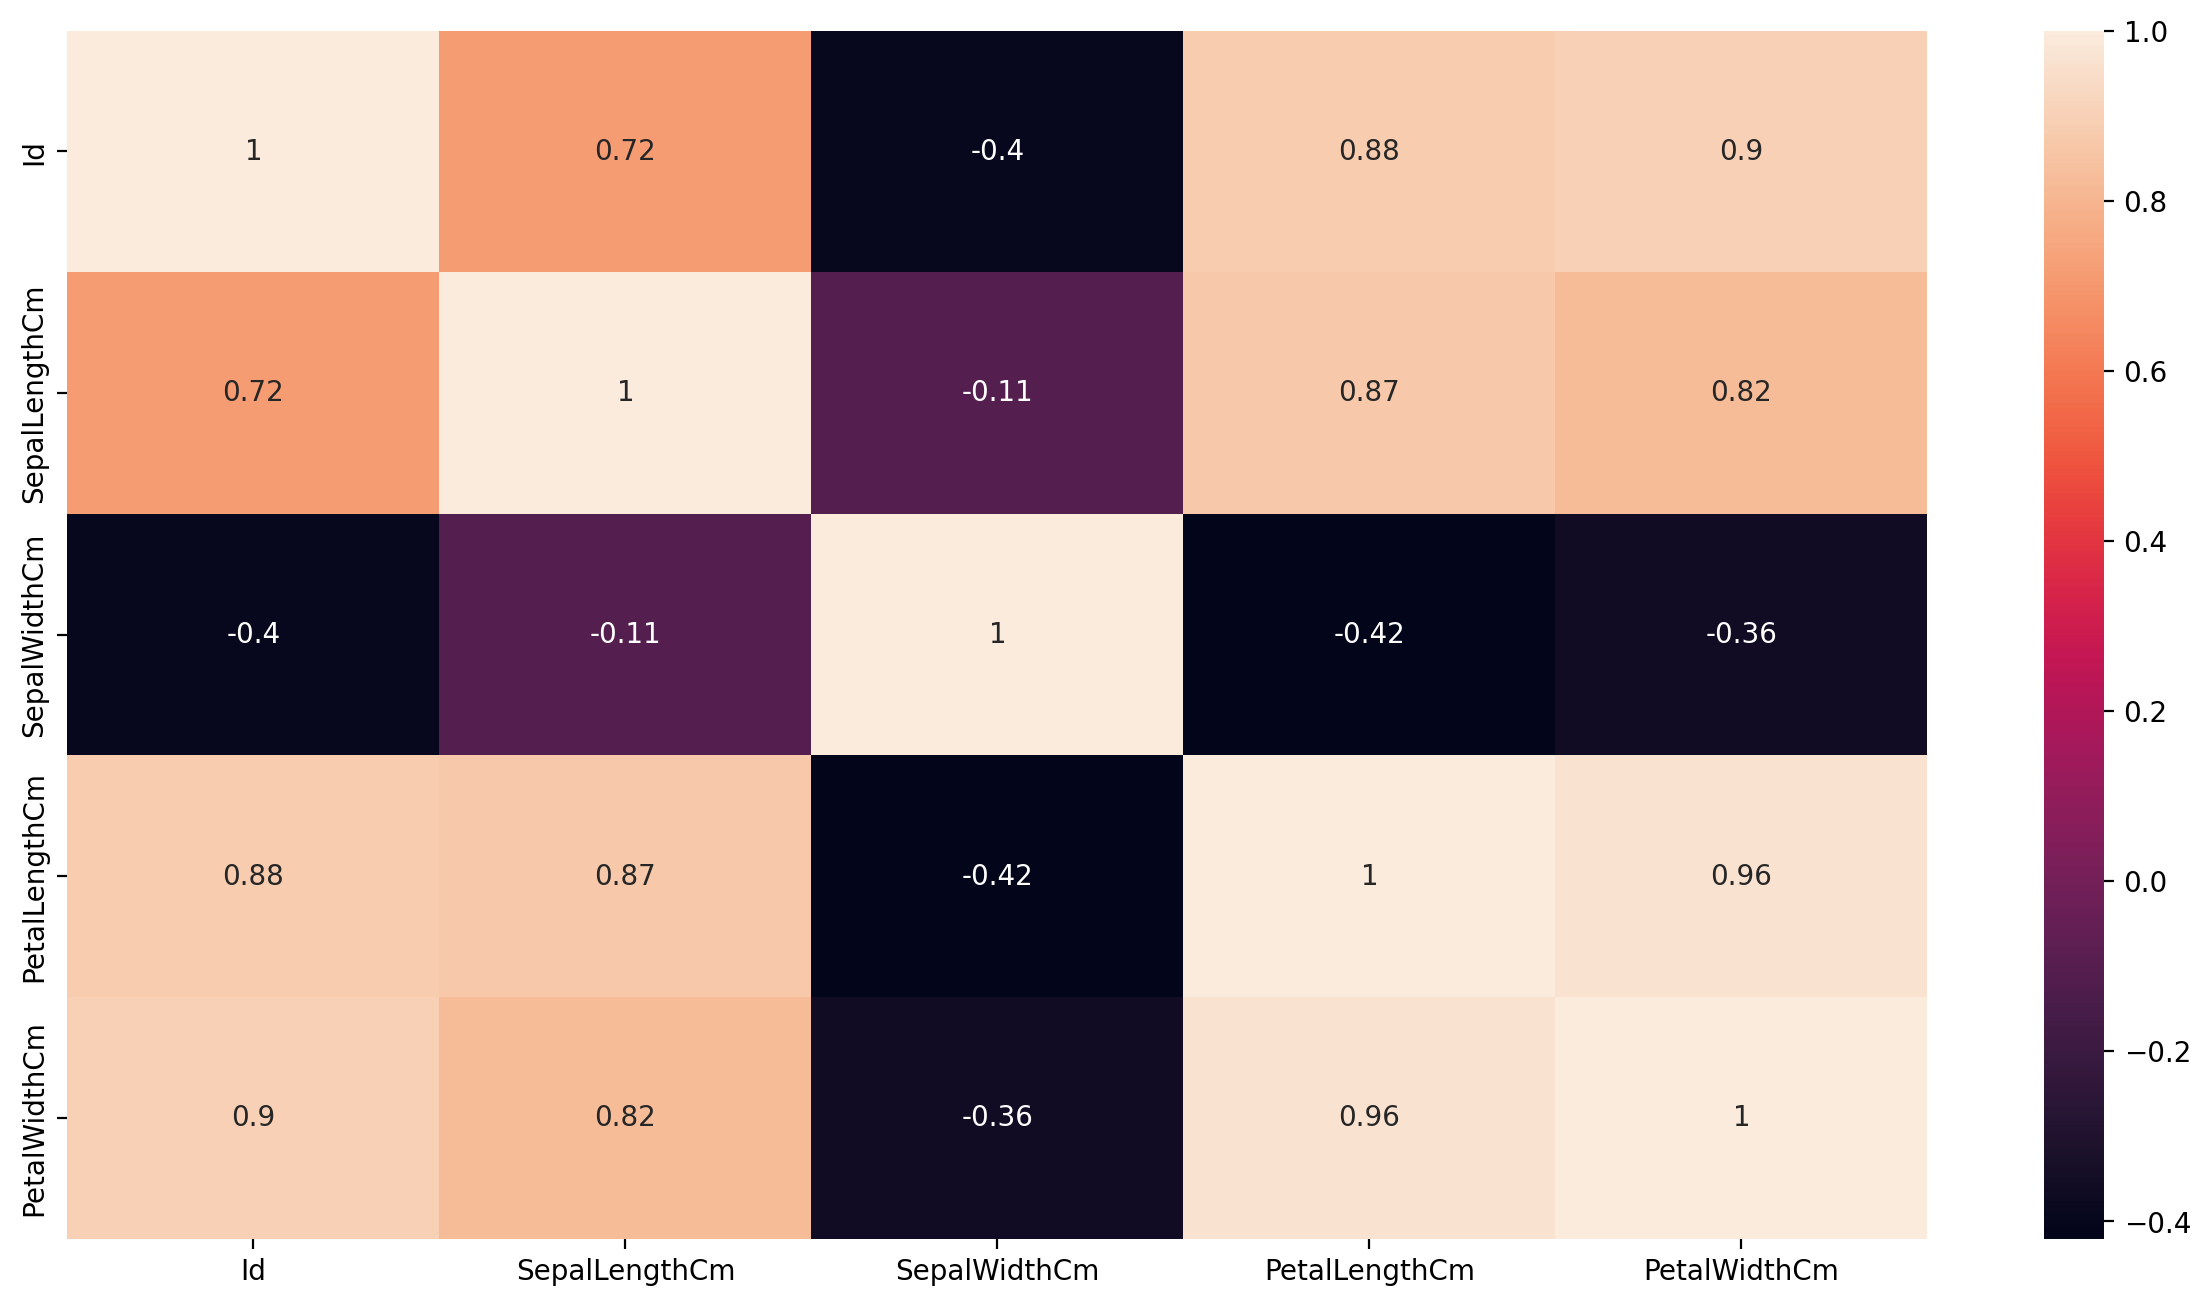

In [11]:
fig = plt.figure(figsize=(15,8,), dpi=200)
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [13]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [14]:
print(x)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [15]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)


In [17]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = regressor.predict(x_test)
print("Pridicted values \n", y_pred)

Pridicted values 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [19]:
import sklearn.metrics as metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


## future prediction

In [29]:
a = float(input("enter the sepel length: "))
b = float(input("enter the sepel width: "))
c = float(input("enter the petal length: "))
d = float(input("enter the petal width: "))
f"y_pred = regressor.predict([[a, b, c, d]])"
if(y_pred == 0).any():
    print("iris setosa")
elif(y_pred == 1):
        print("iris versicolor")
else:
            print("iris virginica")

enter the sepel length: 7.7
enter the sepel width: 2.8
enter the petal length: 6.7
enter the petal width: 2
iris setosa
